In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [54]:
url = 'https://covidtracking.com/api/states/daily.csv'
df = pd.read_csv(url)


In [93]:
state = 'VA'
stat = 'death'

In [92]:
df

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200328,AK,85.0,2836.0,NaN,5.0,2.0,2921,edb7e6bcde715f8bbea31547e99aa8b4712ea5fb,2020-03-28T20:00:00Z,2921,2,1.0,2.0,517.0,16.0,533.0
1,20200328,AL,696.0,4184.0,NaN,NaN,3.0,4880,c9986a845bd2f8f9c9a4294a8e5d66a01ee6aadf,2020-03-28T20:00:00Z,4880,1,0.0,0.0,0.0,109.0,109.0
2,20200328,AR,404.0,2938.0,0.0,48.0,5.0,3342,47d05acbbf2fbb56ddd9c44c3b9e204d10f050c3,2020-03-28T20:00:00Z,3342,5,2.0,0.0,1393.0,23.0,1416.0
3,20200328,AS,0.0,NaN,0.0,NaN,0.0,0,c6fae61e10e1a1154e848a52a3665304ec76dd53,2020-03-28T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0
4,20200328,AZ,873.0,7455.0,21.0,NaN,15.0,8349,9b04c4c073cb904f606bb9efb2ac77c8ecc810cd,2020-03-28T20:00:00Z,8328,4,2.0,0.0,0.0,137.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,20200304,OR,3.0,29.0,18.0,NaN,NaN,50,5b37d7f2e6aa9fb39e09270626674b16ce9b5182,2020-03-04T21:00:00Z,32,41,NaN,NaN,NaN,NaN,NaN
1257,20200304,SC,0.0,5.0,0.0,NaN,NaN,5,992c7ca6f8259ac7a323c0b92c27123c671f3773,2020-03-04T21:00:00Z,5,45,NaN,NaN,NaN,NaN,NaN
1258,20200304,TX,1.0,NaN,NaN,NaN,NaN,1,7be175c20e3c9485c14f9764bd90385842df19c3,2020-03-04T21:00:00Z,1,48,NaN,NaN,NaN,NaN,NaN
1259,20200304,WA,39.0,NaN,NaN,NaN,NaN,39,36ea36bcf282dcc480c83b6f2561810b009bc951,2020-03-04T21:00:00Z,39,53,NaN,NaN,NaN,NaN,NaN


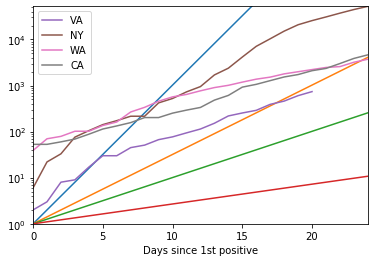

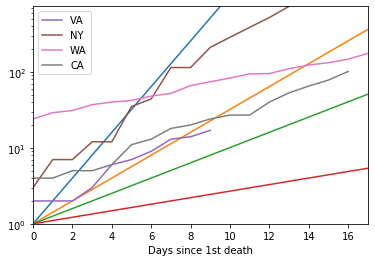

In [101]:
SUFFIXES = {1: 'st', 2: 'nd', 3: 'rd'}
def ordinal(num):
    # I'm checking for 10-20 because those are the digits that
    # don't follow the normal counting scheme. 
    if 10 <= num % 100 <= 20:
        suffix = 'th'
    else:
        # the second parameter is a default.
        suffix = SUFFIXES.get(num % 10, 'th')
    return str(num) + suffix
for stat in ['positive', 'death']:
    fig, ax = plt.subplots()
    df_grid['daily']=2 ** (df_grid.index)
    df_grid['2 days']=2 ** (df_grid.index / 2)
    df_grid['3 days']=2 ** (df_grid.index / 3)
    df_grid['7 days']=2 ** (df_grid.index / 7)
    for col in df_grid.columns:
        ax.semilogy(df_grid.index, df_grid[col])
    x_max, y_max = 0, 0
    for state in ['VA', 'NY', 'WA', 'CA']:
        df_plot = df[df['state']==state]
        pd.set_option("mode.chained_assignment", None)
        df_plot['NewDate'] = pd.to_datetime(df_plot['date'].copy(), format='%Y%m%d')
        starting_caseload = 1
        start_date = df_plot[(df_plot[stat])>starting_caseload]['NewDate'].min()
        df_plot['date_zero'] = (df_plot['NewDate'] - start_date).astype('timedelta64[D]')
        pd.set_option("mode.chained_assignment", 'warn')   
        ax.semilogy(df_plot['date_zero'], df_plot[stat], label=state)
        if df_plot[stat].max() > y_max:
            y_max = df_plot[stat].max()
        if df_plot['date_zero'].max() > x_max:
            x_max = df_plot['date_zero'].max()
    ax.set_ylim(top=y_max, bottom=1)
    ax.set_xlim(left=0, right=x_max)
    ax.legend()
    str_xaxis_label = 'Days since {:s} {:s}'.format(ordinal(starting_caseload), stat)
    ax.set_xlabel(str_xaxis_label)

In [99]:
str_xaxis_label

'Days since 1st death'

In [77]:
df_grid.columns

Index(['daily', '2 days', '3 days', '7 days'], dtype='object')

In [15]:
t = pd.to_datetime(df_plot['date'], format='%Y%m%d')

In [16]:
t

49     2020-03-28
105    2020-03-27
161    2020-03-26
217    2020-03-25
273    2020-03-24
329    2020-03-23
385    2020-03-22
441    2020-03-21
497    2020-03-20
553    2020-03-19
609    2020-03-18
665    2020-03-17
721    2020-03-16
773    2020-03-15
824    2020-03-14
875    2020-03-13
926    2020-03-12
977    2020-03-11
1028   2020-03-10
1079   2020-03-09
1130   2020-03-08
1181   2020-03-07
1218   2020-03-06
1244   2020-03-05
Name: date, dtype: datetime64[ns]

In [17]:
s=df_plot['positive']

In [18]:
s

49      739.0
105     604.0
161     460.0
217     391.0
273     290.0
329     254.0
385     219.0
441     152.0
497     114.0
553      94.0
609      77.0
665      67.0
721      51.0
773      45.0
824      30.0
875      30.0
926      17.0
977       9.0
1028      8.0
1079      3.0
1130      2.0
1181      0.0
1218      0.0
1244      0.0
Name: positive, dtype: float64

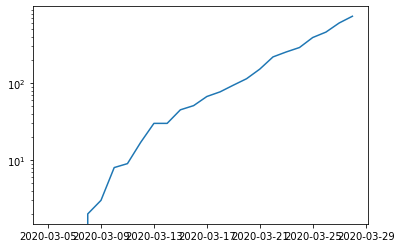

In [75]:
df_grid

,daily,2 days,3 days,7 days
0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
0.25,1.189207e+00,1.090508e+00,1.059463e+00,1.025064
0.50,1.414214e+00,1.189207e+00,1.122462e+00,1.050757
0.75,1.681793e+00,1.296840e+00,1.189207e+00,1.077093
1.00,2.000000e+00,1.414214e+00,1.259921e+00,1.104090
...,...,...,...,...
98.75,5.329814e+29,7.300558e+14,8.107819e+09,17647.092134
99.00,6.338253e+29,7.961315e+14,8.589935e+09,18089.402592
99.25,7.537496e+29,8.681875e+14,9.100719e+09,18542.799213
99.50,8.963643e+29,9.467652e+14,9.641876e+09,19007.559863
